In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# read data from given file
def read_data(path = None):

    data = pd.read_excel(path)
    
    # drop those records which contain 0 values
    data = data.replace(0, np.NaN)
    data = data.dropna()
    
    # divide the data into features and labels
    X = data.loc[:, ['PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3']]
    Y = data.loc[:, '质量等级']

    return [np.array(X), np.array(Y)]

In [10]:
# read train dataset and test dataset separately
[X_train, Y_train] = read_data('train.xlsx')
[X_test, Y_test] = read_data('test.xlsx')

In [11]:
# use K-fold cross validation to find the best parameter K
performance = []
kf = KFold(n_splits = 10, shuffle = False)

for K in np.arange(1, 30, 5):
    # use average F1 score to evaluate the performance of a K value
    total_score = 0

    KNN_model = KNeighborsClassifier(n_neighbors = K)

    for train_index, valid_index in kf.split(X_train):
        KX_train, KX_valid = X_train[train_index], X_train[valid_index]
        KY_train, KY_valid = Y_train[train_index], Y_train[valid_index]

        # train the model
        KNN_model.fit(KX_train, KY_train)
        # 获取每条测试数据的预测结果
        results = KNN_model.predict(KX_valid)
        # 计算当前K值的f1-score
        total_score +=sklearn.metrics.f1_score(KY_valid.tolist(), results, average = 'weighted')

    performance.append(total_score / 10)

In [12]:
# configuration for plt to visualize the performance of different K values
def show(performance, Ks):
    
    plt.figure(figsize = (9, 6))
    plt.grid(True, linestyle = '-.')
    plt.xticks(Ks)
    plt.plot(Ks, performance, marker = '.')
    plt.xlabel("K")
    plt.ylabel("F1 score")
    
    best_K = Ks[performance.index(np.max(performance))]
    plt.title("Line chart for F1 score of my KNN model\n(best K = %d)" % best_K)
    plt.show()

    return best_K

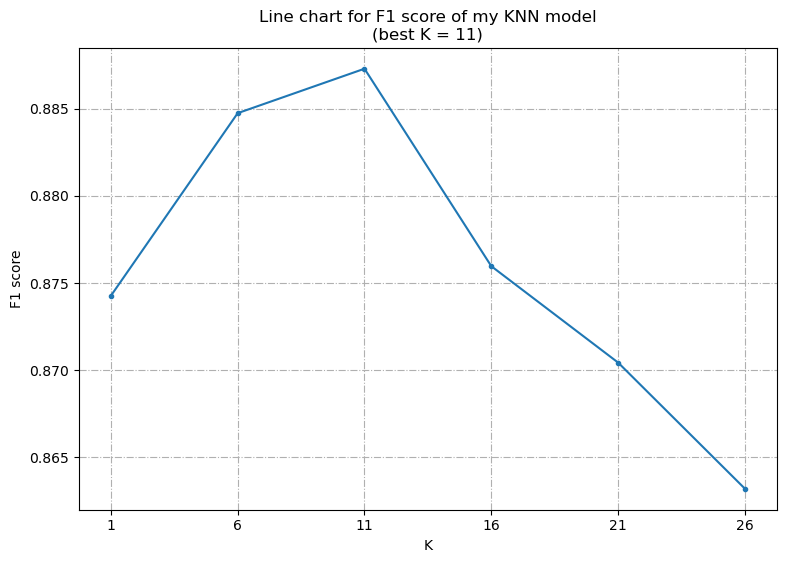

In [13]:
best_K = show(performance, np.arange(1, 30, 5))

In [14]:
# re-train the model with the best parameter we find
KNN_model = KNeighborsClassifier(n_neighbors = best_K)
KNN_model.fit(X_test, Y_test) 

# use test set to evaluate the model
results = KNN_model.predict(X_test)

F1 = sklearn.metrics.f1_score(Y_test.tolist(), results, average = 'weighted')
print('F1 score: ', F1)
print('details:\n', sklearn.metrics.classification_report(Y_test.tolist(), results))

F1 score:  0.9232815727882665
details:
               precision    recall  f1-score   support

        中度污染       0.81      0.62      0.70        34
           优       0.98      0.96      0.97       101
           良       0.95      0.98      0.97       186
        轻度污染       0.86      0.95      0.90        95
        重度污染       1.00      0.44      0.62         9

    accuracy                           0.93       425
   macro avg       0.92      0.79      0.83       425
weighted avg       0.93      0.93      0.92       425

